In [4]:
import os
import glob

import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras


In [5]:
# !unzip image.zip

Archive:  image.zip
   creating: image/
   creating: image/Duc/
  inflating: image/Duc/Duc_256.jpg   
  inflating: image/Duc/Duc_380.jpg   
  inflating: image/Duc/Duc_372.jpg   
  inflating: image/Duc/Duc_276.jpg   
  inflating: image/Duc/Duc_216.jpg   
  inflating: image/Duc/Duc_228.jpg   
  inflating: image/Duc/Duc_264.jpg   
  inflating: image/Duc/Duc_248.jpg   
  inflating: image/Duc/Duc_376.jpg   
  inflating: image/Duc/Duc_240.jpg   
  inflating: image/Duc/Duc_268.jpg   
  inflating: image/Duc/Duc_396.jpg   
  inflating: image/Duc/Duc_292.jpg   
  inflating: image/Duc/Duc_224.jpg   
  inflating: image/Duc/Duc_296.jpg   
  inflating: image/Duc/Duc_260.jpg   
  inflating: image/Duc/Duc_404.jpg   
  inflating: image/Duc/Duc_252.jpg   
  inflating: image/Duc/Duc_384.jpg   
  inflating: image/Duc/Duc_280.jpg   
  inflating: image/Duc/Duc_392.jpg   
  inflating: image/Duc/Duc_388.jpg   
  inflating: image/Duc/Duc_212.jpg   
  inflating: image/Duc/Duc_220.jpg   
  inflating: image/Duc/D

In [6]:
# load image
path_dir = os.path.join(os.getcwd(), 'image')
path_dir = sorted(glob.glob(path_dir + '/*'))

Duc = glob.glob(path_dir[0] + '/*.jpg')
Phuoc = glob.glob(path_dir[1] + '/*.jpg')
Thanh = glob.glob(path_dir[2] + '/*.jpg')

In [7]:
img_cnt = len(Duc) + len(Phuoc) + len(Thanh)
print(img_cnt)

class_names = ['Duc', 'Phuoc', 'Thanh']
num_classes = len(class_names)
print(class_names)

125
['Duc', 'Phuoc', 'Thanh']


In [8]:
def load_image(path, img_size=(180, 180)):
    img = cv2.imread(path, 1)
    img = cv2.resize(img, img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img

In [9]:
def load_images(path_dir):
    images = []
    labels = []

    path_dir = sorted(glob.glob(path_dir + '/*'))
    print(path_dir)
    for paths in path_dir:
        paths = sorted(glob.glob(paths + '/*.jpg'))
        for path in paths:
            img = load_image(path)
            images.append(img)
            labels.append(class_names.index(os.path.basename(os.path.dirname(path))))
    return np.array(images), np.array(labels)

In [10]:
data_dir = os.path.join(os.getcwd(), 'image')
dataset = load_images(data_dir)

['/content/image/Duc', '/content/image/Phuoc', '/content/image/Thanh']


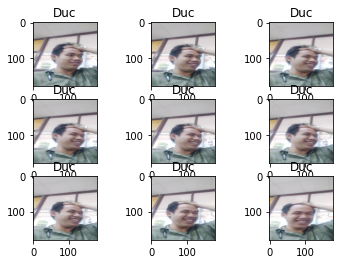

In [11]:
for i in range(9):
  # print(class_names[dataset[1][i]])
  plt.subplot(3, 3, i+1)
  plt.title(class_names[dataset[1][i]])
  plt.imshow(dataset[0][i])


In [12]:
print(dataset[0].shape)
print(dataset[1].shape)

(125, 180, 180, 3)
(125,)


In [13]:
# train test split
train_images, test_images, train_labels, test_labels = train_test_split(dataset[0], dataset[1], test_size=0.2, random_state=42)
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(100, 180, 180, 3)
(25, 180, 180, 3)
(100,)
(25,)


In [14]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = keras.utils.np_utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.np_utils.to_categorical(test_labels, num_classes)

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(100, 180, 180, 3)
(25, 180, 180, 3)
(100, 3)
(25, 3)


In [15]:
def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 128)      

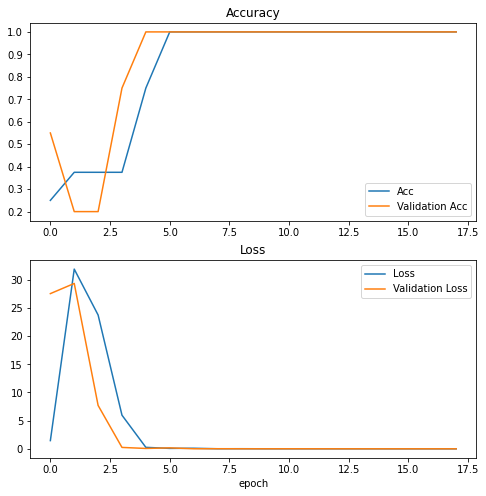

In [30]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(180, 180, 3)))

model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(3,activation = 'softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer =tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['acc'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

history = model.fit(train_images, train_labels, batch_size = 128, epochs = 50, validation_split = 0.2, callbacks=[early_stopping])
model.save('classification_3_person')
plot_history(history)

In [31]:
print("test loss, test acc:", model.evaluate(test_images, test_labels))

1/1 [==============================] - 1s 903ms/step - loss: 3.5240e-04 - acc: 1.0000
test loss, test acc: [0.0003524015482980758, 1.0]


Text(0.5, 1.0, 'Predict: Duc')

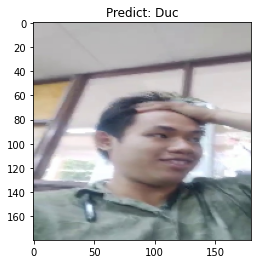

In [32]:
img_test = load_image('image/Duc/Duc_212.jpg')

plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: Phuoc')

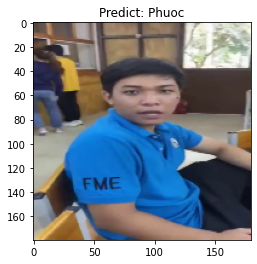

In [33]:
img_test = load_image('/content/image/Phuoc/Phuoc_244.jpg')
plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))

Text(0.5, 1.0, 'Predict: Thanh')

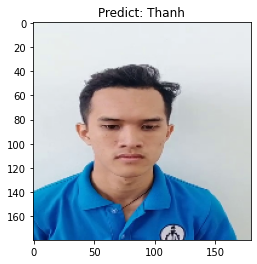

In [34]:
# from tensorflow.keras.preprocessing.image import load_img
img_test = load_image('/content/image/Thanh/Thanh_116.jpg')

plt.imshow(img_test)

img_test = np.asarray(img_test)

img_test = img_test / 255
img_test = np.expand_dims(img_test, axis=0)

classe_num = np.argmax(model.predict(img_test))
plt.title("Predict: {}".format(class_names[classe_num]))